In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, replace_list_values_by_condition
from ipynb.fs.full.plots import single_barplot, pie_chart

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D13_ML_Programming_Language_C', 'D13_ML_Programming_Language_Java', 'D13_ML_Programming_Language_Javascript', 
    'D13_ML_Programming_Language_Julia', 'D13_ML_Programming_Language_MatLab', 'D13_ML_Programming_Language_Python', 
    'D13_ML_Programming_Language_R', 'D13_ML_Programming_Language_Others', 'D13_ML_Programming_Language_Others_Free']].head()

,D13_ML_Programming_Language_C,D13_ML_Programming_Language_Java,D13_ML_Programming_Language_Javascript,D13_ML_Programming_Language_Julia,D13_ML_Programming_Language_MatLab,D13_ML_Programming_Language_Python,D13_ML_Programming_Language_R,D13_ML_Programming_Language_Others,D13_ML_Programming_Language_Others_Free
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
3,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
4,quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99
5,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
6,not quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99


In [5]:
print(df['D13_ML_Programming_Language_C'].value_counts())
print()
print("Total de Questões marcadas: " + str(df['D13_ML_Programming_Language_C'].value_counts()['quoted']))

not quoted    232
quoted         44
Name: D13_ML_Programming_Language_C, dtype: int64

Total de Questões marcadas: 44


In [6]:
languages = ['C/C++', 'Java', 'Javascript', 'Julia', 'Matlab', 'Python', 'R']

In [7]:
# the values follow the same position of previous declared list
languages_total = [
    df['D13_ML_Programming_Language_C'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Java'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Javascript'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Julia'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_MatLab'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Python'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_R'].value_counts()['quoted'],
]

In [8]:
# dataframe specific for question D13
d13_df = pd.DataFrame(data={'Main Languages': languages, 'Answers': languages_total})

In [9]:
d13_df

,Main Languages,Answers
0,C/C++,44
1,Java,44
2,Javascript,45
3,Julia,3
4,Matlab,16
5,Python,222
6,R,54


In [10]:
df['D13_ML_Programming_Language_Others_Free'].value_counts().index

Index(['-99', 'C#', 'Scala', 'SAS', 'SQL', 'Fortran', 'Python', 'sql', 'scala',
       'SAS Guide, SAS Miner, Knime, IBM Modeler, SPSS Clementine ',
       'SAS / SQL', 'Typescript', 'Sas', 'c#',
       'React JS for visualisations and interaction with the project', 'Go',
       '.Net Core', '.Net Core, C#', 'Groovy, Postgresql', 'Proprietor'],
      dtype='object')

In [11]:
# some people answered in the others field some of the listed options
extra_python = df['D13_ML_Programming_Language_Others_Free'].value_counts()['Python']
        
extra_js = df['D13_ML_Programming_Language_Others_Free'].value_counts()['React JS for visualisations and interaction with the project']

In [12]:
d13_df[d13_df['Main Languages'] == 'Python'] = ['Python', int(d13_df[d13_df['Main Languages'] == 'Python']['Answers']) + extra_python]
d13_df[d13_df['Main Languages'] == 'Javascript'] = ['Javascript', int(d13_df[d13_df['Main Languages'] == 'Javascript']['Answers']) + extra_js]

In [13]:
# compute total of unique answers in this question (assumin the free answer field answers that we considered)
total = extra_python + extra_js
for idx, row in df.iterrows():
    if row['D13_ML_Programming_Language_C'] == 'quoted' or row['D13_ML_Programming_Language_Java'] == 'quoted' or row['D13_ML_Programming_Language_Javascript'] == 'quoted' or row['D13_ML_Programming_Language_Julia'] == 'quoted' or row['D13_ML_Programming_Language_MatLab'] == 'quoted' or row['D13_ML_Programming_Language_Python'] == 'quoted' or row['D13_ML_Programming_Language_R'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)

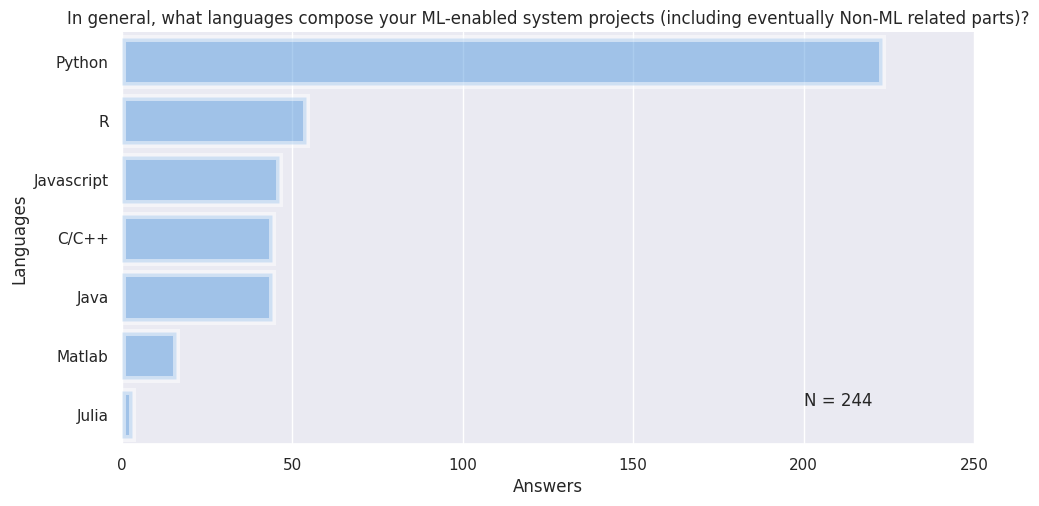

In [14]:
# we sort the dataframe to plot the bars decreasingly
single_barplot(d13_df.sort_values(by=['Answers'], ascending=False), "Answers", "Main Languages",
               title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?",
               x_label="Answers", y_label="Languages", color="#429bf5",total_answers=total_answers)

In [15]:
# group same values in a specific one
replace_list_values_by_condition(df, 'D13_ML_Programming_Language_Others_Free',
                                ['c#', '.Net Core', '.Net Core, C#'], 
                                'C#', 'eq')
replace_list_values_by_condition(df, 'D13_ML_Programming_Language_Others_Free',
                                ['React JS for visualisations and interaction with the project'], 
                                'React JS', 'eq')
replace_list_values_by_condition(df, 'D13_ML_Programming_Language_Others_Free',
                                ['scala'], 
                                'Scala', 'eq')
replace_list_values_by_condition(df, 'D13_ML_Programming_Language_Others_Free',
                                ['SAS', 'SQL', 'SAS Guide, SAS Miner, Knime, IBM Modeler, SPSS Clementine ', 'Sas', 'sql'], 
                                'SAS / SQL', 'eq')

In [16]:
print(df['D13_ML_Programming_Language_Others_Free'].value_counts())
print(20*"-")
print(list(df['D13_ML_Programming_Language_Others_Free'].unique()))

-99                   245
SAS / SQL              10
C#                      8
Scala                   4
Fortran                 2
Groovy, Postgresql      1
Go                      1
React JS                1
Typescript              1
Python                  1
Proprietor              1
Name: D13_ML_Programming_Language_Others_Free, dtype: int64
--------------------
['-99', 'C#', 'SAS / SQL', 'Groovy, Postgresql', nan, 'Go', 'React JS', 'Typescript', 'Scala', 'Python', 'Fortran', 'Proprietor']


In [17]:
# normalize to the sum become 100
sum_values = sum(d13_df['Answers'])
normalized_values = [(float(v)/sum_values)* 100 for v in d13_df['Answers']]

In [18]:
normalized_values

[10.232558139534884,
 10.232558139534884,
 10.69767441860465,
 0.6976744186046512,
 3.7209302325581395,
 51.86046511627907,
 12.558139534883722]

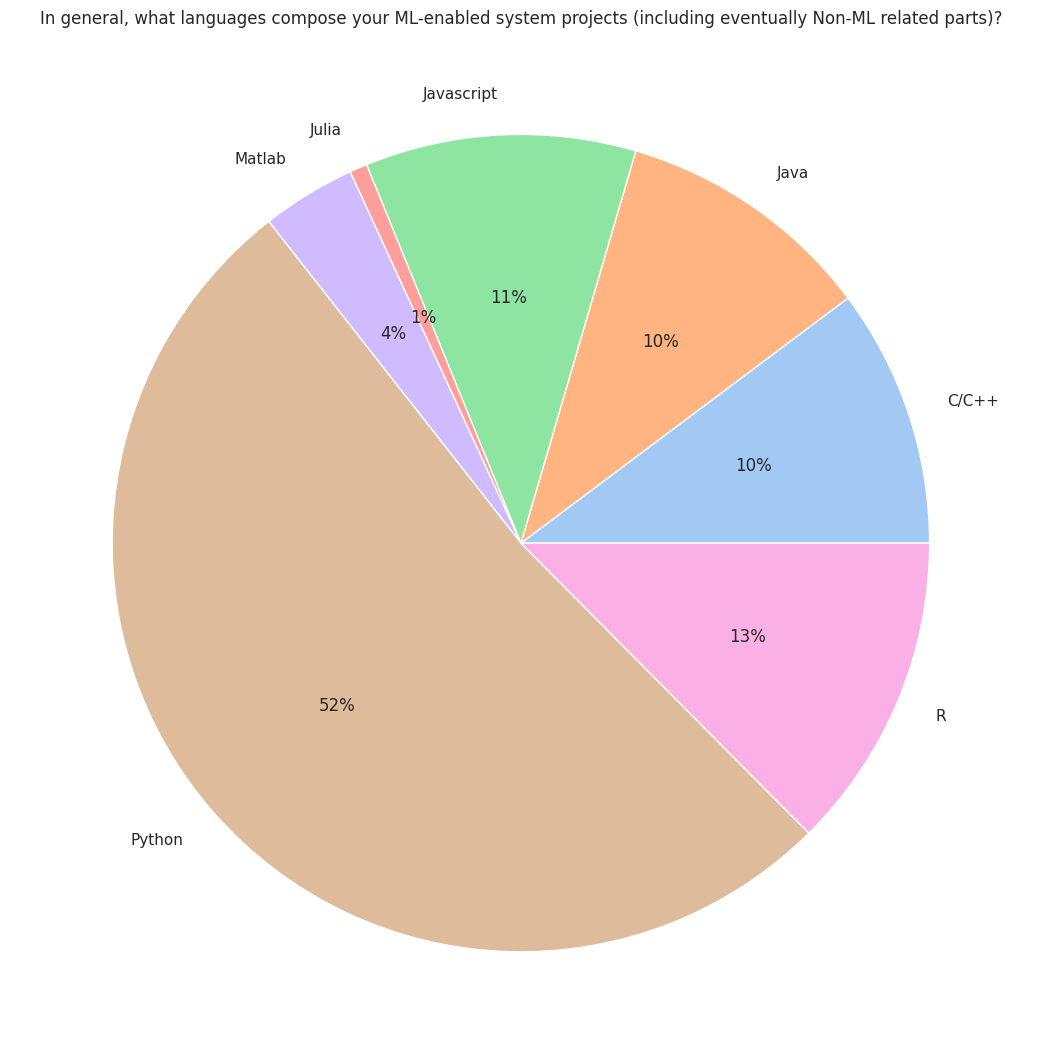

In [19]:
pie_chart(normalized_values, d13_df['Main Languages'], 
          title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?")